# Importing Libraries

In [1]:
#importing
import pandas as pd
import numpy  as np
import  os
import matplotlib.pyplot as  plt
import seaborn as sns
import  scipy

In [2]:
instacart_merged = pd.read_pickle(r'C:\Users\makay\Documents\Pythons files\Master folder\02 Data\Prepared data\4.9 instacart merged.pkl')

In [3]:
instacart_merged.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_time_ordering,product_id,add_to_cart_order,reordered,...,First_name,Last_name,Gender,State,Age,date_joined,number_of_dependents,Family_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# Is PII an issue for this dataset?

No, because the data for customers was fabricated for the use of this assignment therefore it could not br traced back to an actual individual.

# Create region column based on state column

In [4]:
#Making a region list so that we can make a region column
region =[]

In [5]:
for value in instacart_merged['State']:
    if value == ('Maine' or 'New Hampshire' or 'Vermont' or'Massachusetts' or 'Rhode Island' or 'Connecticut' or 'New York' or 'Pennsylvania' or 'New Jersey'):
        region.append('Northeast')
    elif value == ('Wisconsin' or 'Michigan' or 'Illinois' or 'Indiana' or 'Ohio' or 'North Dakota' or 'South Dakota' or 'Nebraska' or 'Kansas' or 'Minnesota' or 'Iowa' or 'Missouri' ):
        region.append('Midwest')
    elif value == ('Delaware' or 'Maryland' or 'District of Columbia' or 'Virginia' or 'West Virginia' or 'North Carolina' or 'South Carolina' or 'Georgia' or 'Florida' or 'Kentucky' or 'Tennessee' or 'Mississippi' or 'Alabama' or 'Oklahoma' or 'Texas' or 'Arkansas' or 'Louisiana'):
        region.append('South')
    else:
        region.append('West')

In [6]:
#Creating Region column and checking accuracy

In [7]:
instacart_merged['Region'] = region

In [8]:
instacart_merged['Region'].value_counts(dropna=False)

West         28860840
Northeast      610863
South          599369
Midwest        586275
Name: Region, dtype: int64

In [9]:
instacart_merged.shape

(30657347, 35)

In [10]:
#Checking spending habits between Region and Spending_flag
Spending_habits = pd.crosstab(instacart_merged['Region'], instacart_merged['Spending_flag'], dropna = False)

In [11]:
Spending_habits.head()

Spending_flag,High Spender,Low Spender
Region,,
Midwest,585539,736
Northeast,610081,782
South,598732,637
West,28833011,27829


You can see the West has the largest High Spenders while Midwest has the lowest High Spenders.

# Create exclusion flag for low-activity  customers

In [12]:
#exclusion flag for low-activity customers
instacart_merged.loc[instacart_merged['max_order']< 5, 'exclusion_flag'] = 'Low_activity_customer'

In [13]:
instacart_merged.loc[instacart_merged['max_order']>=5, 'exclusion_flag'] = 'Regular_activity_customer'

In [14]:
#Checking results 
instacart_merged['exclusion_flag']. value_counts(dropna=False)

Regular_activity_customer    29297366
Low_activity_customer         1359981
Name: exclusion_flag, dtype: int64

In [15]:
instacart_merged.shape

(30657347, 36)

Results match shape of total data showing us it is correct

In [16]:
#Creating a subset for low activity from main data set so that it can be exported 
instacart_low_activity = instacart_merged [instacart_merged['exclusion_flag'] == 'Low_activity_customer']

In [17]:
instacart_low_activity.shape

(1359981, 36)

Results of shape match the above checked results which shows us that the subsetting was done correctly

In [18]:
#Exporting the new subset
instacart_low_activity.to_pickle(r'C:\Users\makay\Documents\Pythons files\Master folder\02 Data\Prepared data\low_activity.pkl')

In [19]:
#Creating a subset for regular activity from main data set so that it can be exported
instacart_regular_activity = instacart_merged [instacart_merged['exclusion_flag'] == 'Regular_activity_customer']

In [20]:
instacart_regular_activity.shape

(29297366, 36)

Results of shape match above checked results which shows us that the subsetting was done correctly

In [21]:
#Exporting regular activity subset
instacart_regular_activity.to_pickle(r'C:\Users\makay\Documents\Pythons files\Master folder\02 Data\Prepared data\regular_activity.pkl')

# Profiling Customers by different variables

Profiling first with age variable

In [22]:
instacart_regular_activity ['Age'].describe()

count    2.929737e+07
mean     4.947578e+01
std      1.847847e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

Based on results age groups would be 
18-38: young adult,
39-59: middle age adult,
60 and older: senior adult

In [23]:
#Creating flag for age varibale
instacart_regular_activity.loc[(instacart_regular_activity['Age']>=18)&(instacart_regular_activity['Age']<=38), 'age_flag'] = 'Young_adult'
instacart_regular_activity.loc[(instacart_regular_activity['Age']>=39)&(instacart_regular_activity['Age']<=59), 'age_flag'] = 'Middle_age_adult'
instacart_regular_activity.loc[instacart_regular_activity['Age']>60, 'age_flag'] = 'Senior_adult'

C:\Users\makay\AppData\Local\Temp\ipykernel_19404\1931046354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_regular_activity.loc[(instacart_regular_activity['Age']>=18)&(instacart_regular_activity['Age']<=38), 'age_flag'] = 'Young_adult'


In [24]:
#Checking results
instacart_regular_activity['age_flag'].value_counts(dropna=False)

Middle_age_adult    9670532
Young_adult         9619075
Senior_adult        9569713
NaN                  438046
Name: age_flag, dtype: int64

Profiling income variable

In [25]:
instacart_regular_activity ['income'].describe()

count    2.929737e+07
mean     9.969391e+04
std      4.314577e+04
min      2.590300e+04
25%      6.736300e+04
50%      9.676000e+04
75%      1.281380e+05
max      5.939010e+05
Name: income, dtype: float64

Based on results categories would be 0-100,000: low income, 100,001-200,000: low middle income, 200,001-300,000: ,middle income, 300,0001-400,000: high middle income, 400,001 or greater: high income

In [26]:
#Creating income flag
instacart_regular_activity.loc[(instacart_regular_activity['income']>=0)&(instacart_regular_activity['income']<=100000), 'income_flag'] = 'low_income'
instacart_regular_activity.loc[(instacart_regular_activity['income']>=100001)&(instacart_regular_activity['income']<=200000), 'income_flag'] = 'low_middle_income'
instacart_regular_activity.loc[(instacart_regular_activity['income']>=200001)&(instacart_regular_activity['income']<=300000), 'income_flag'] = 'middle_income'
instacart_regular_activity.loc[(instacart_regular_activity['income']>=300001)&(instacart_regular_activity['income']<=400000), 'income_flag'] = 'high_middle_income'
instacart_regular_activity.loc[instacart_regular_activity['income']>400001, 'income_flag'] = 'high_income'


C:\Users\makay\AppData\Local\Temp\ipykernel_19404\678084009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_regular_activity.loc[(instacart_regular_activity['income']>=0)&(instacart_regular_activity['income']<=100000), 'income_flag'] = 'low_income'


In [27]:
#Checking results
instacart_regular_activity['income_flag'].value_counts(dropna=False)

low_income            15850368
low_middle_income     13206931
middle_income           145377
high_middle_income       49248
high_income              45442
Name: income_flag, dtype: int64

Profiling number of dependents variable

In [28]:
instacart_regular_activity.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_time_ordering,product_id,add_to_cart_order,reordered,...,Age,date_joined,number_of_dependents,Family_status,income,_merge,Region,exclusion_flag,age_flag,income_flag
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,31,2/17/2019,3,married,40423,both,West,Regular_activity_customer,Young_adult,low_income
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,31,2/17/2019,3,married,40423,both,West,Regular_activity_customer,Young_adult,low_income
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,31,2/17/2019,3,married,40423,both,West,Regular_activity_customer,Young_adult,low_income
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,31,2/17/2019,3,married,40423,both,West,Regular_activity_customer,Young_adult,low_income
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,31,2/17/2019,3,married,40423,both,West,Regular_activity_customer,Young_adult,low_income


Categories will be 0-1 dependents: small family, 1-2 dependents: medium family, 3 or more: large family

In [29]:
#Creating dependent flag
instacart_regular_activity.loc[(instacart_regular_activity['number_of_dependents']>=0)&(instacart_regular_activity['number_of_dependents']<=1), 'dependent_flag'] = 'small_family'
instacart_regular_activity.loc[(instacart_regular_activity['number_of_dependents']>=1)&(instacart_regular_activity['number_of_dependents']<=2), 'dependent_flag'] = 'middle_family'
instacart_regular_activity.loc[instacart_regular_activity['number_of_dependents']>=3, 'dependent_flag'] = 'large_family'

C:\Users\makay\AppData\Local\Temp\ipykernel_19404\1372580261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_regular_activity.loc[(instacart_regular_activity['number_of_dependents']>=0)&(instacart_regular_activity['number_of_dependents']<=1), 'dependent_flag'] = 'small_family'


In [30]:
#Checking results
instacart_regular_activity['dependent_flag'].value_counts(dropna=False)

middle_family    14633262
large_family      7344622
small_family      7319482
Name: dependent_flag, dtype: int64

Profiling department_id based on department 8 which is pets 

2 Categories if department 8 is bought we can assume they are: pet friendly, if department 8 isn't bought then we can assume they are: anti pet 

In [31]:
#Making pet flag
instacart_regular_activity.loc[(instacart_regular_activity['department_id'] == 8), 'pet_flag'] = 'pet_friendly'
instacart_regular_activity.loc[(instacart_regular_activity['department_id'] != 8), 'pet_flag'] = 'anti_pet'

C:\Users\makay\AppData\Local\Temp\ipykernel_19404\2143296720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_regular_activity.loc[(instacart_regular_activity['department_id'] == 8), 'pet_flag'] = 'pet_friendly'


In [32]:
instacart_regular_activity['pet_flag'].value_counts(dropna=False)

anti_pet        29209509
pet_friendly       87857
Name: pet_flag, dtype: int64

# Creating visualizations based on profiling

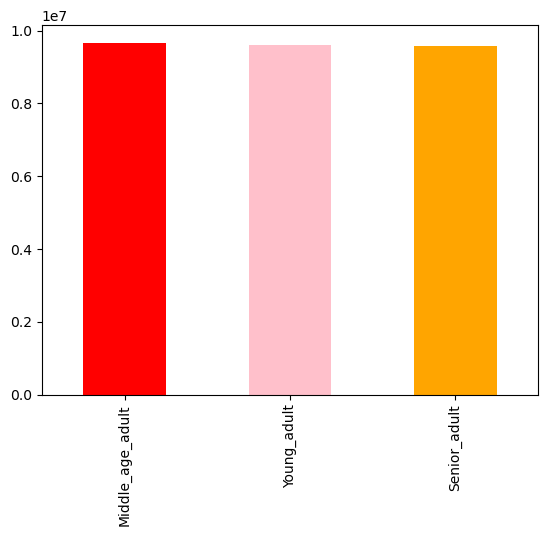

In [33]:
#Bar chart for Age
bar = instacart_regular_activity['age_flag'].value_counts().plot.bar(color =['red', 'pink', 'orange'])

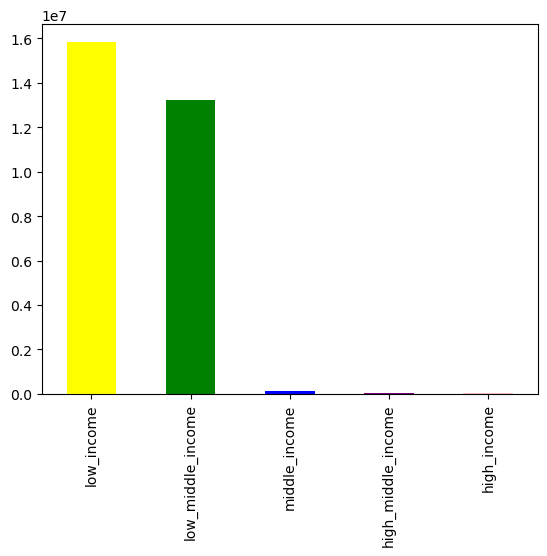

In [34]:
#Creating bar chart for income
bar = instacart_regular_activity['income_flag'].value_counts().plot.bar(color =['yellow', 'green', 'blue','purple','pink'])

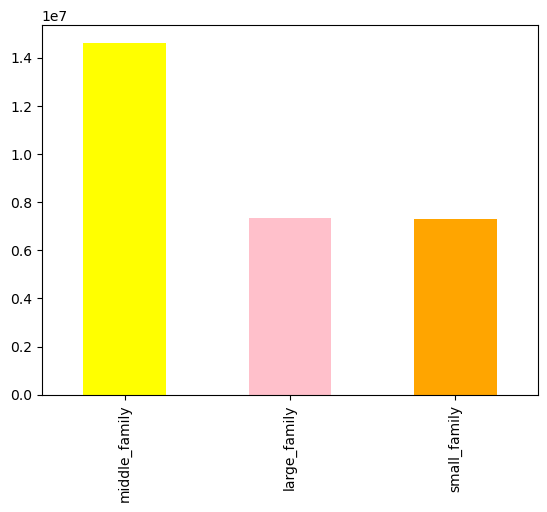

In [35]:
#Creating a bar chart for number of dependents
bar = instacart_regular_activity['dependent_flag'].value_counts().plot.bar(color =['yellow', 'pink', 'orange'])

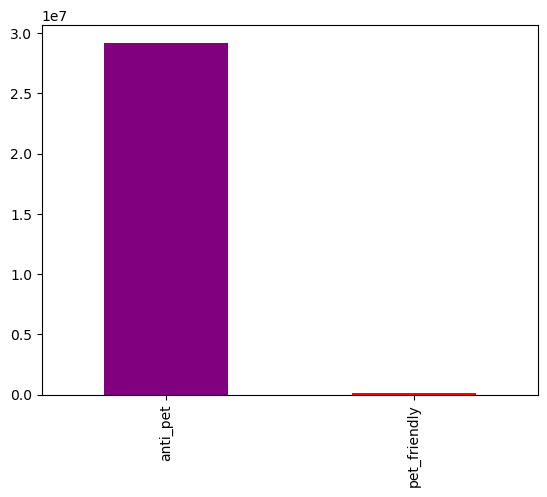

In [36]:
#Creating a bar chart for department id: pet
bar = instacart_regular_activity['pet_flag'].value_counts().plot.bar(color =['purple','red'])

# Finding frequency  and expenditure with  max, mean, and min variables

Age Profile

In [42]:
#Aggregating using agg()
instacart_regular_activity.groupby('age_flag').agg({'days_since_prior_order':['mean','min','max']})

days_since_prior_order           
                                   mean  min   max
age_flag                                          
Middle_age_adult              10.828125  0.0  30.0
Senior_adult                  10.789062  0.0  30.0
Young_adult                   10.820312  0.0  30.0

Income Profile

In [44]:
#Aggregating using agg()
instacart_regular_activity.groupby('income_flag').agg({'days_since_prior_order':['mean','min','max']})

days_since_prior_order           
                                     mean  min   max
income_flag                                         
high_income                     10.406250  0.0  30.0
high_middle_income              10.148438  0.0  30.0
low_income                      10.851562  0.0  30.0
low_middle_income               10.789062  0.0  30.0
middle_income                    9.976562  0.0  30.0

Dependent Profile

In [47]:
#Aggregating using agg()
instacart_regular_activity.groupby('dependent_flag').agg({'days_since_prior_order':['mean','min','max']})

days_since_prior_order           
                                 mean  min   max
dependent_flag                                  
large_family                10.828125  0.0  30.0
middle_family               10.820312  0.0  30.0
small_family                10.796875  0.0  30.0

Department_id Profile

In [48]:
#Aggregating using agg()
instacart_regular_activity.groupby('pet_flag').agg({'days_since_prior_order':['mean','min','max']})

days_since_prior_order           
                               mean  min   max
pet_flag                                      
anti_pet                  10.812500  0.0  30.0
pet_friendly              11.578125  0.0  30.0

# Compare customer profiles with regions and departments

Age  Profile

In [55]:
#Creating crosstab for age and region
regional_age = pd.crosstab(instacart_regular_activity['age_flag'], instacart_regular_activity['Region'])

In [56]:
regional_age

Region,Midwest,Northeast,South,West
age_flag,,,,
Middle_age_adult,198261,181825,186544,9103902
Senior_adult,177934,206484,191253,8994042
Young_adult,177786,187921,189892,9063476


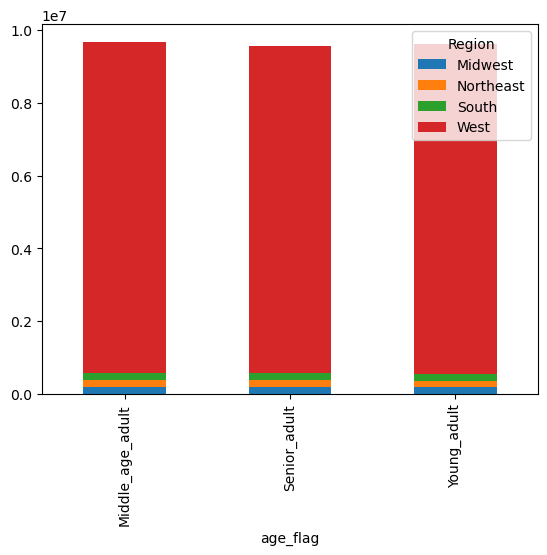

In [58]:
#Creating visualization based on results
regional_age_bar = regional_age.plot(kind= 'bar', stacked = True)

In [63]:
#Creating crosstab for age and department
department_age = pd.crosstab(instacart_regular_activity['department_id'], instacart_regular_activity['age_flag'])

In [64]:
department_age

age_flag,Middle_age_adult,Senior_adult,Young_adult
department_id,,,
1,663146,659066,656050
2,10517,10375,10893
3,351826,346690,349619
4,2829773,2807508,2819013
5,45898,43014,47182
6,80150,77918,80360
7,804425,798961,790156
8,29205,28813,28692
9,257723,252868,255364


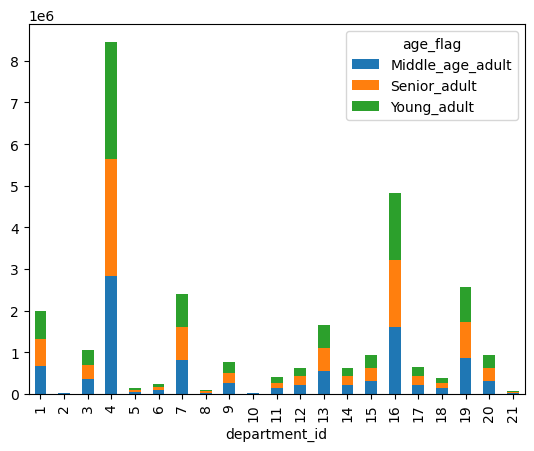

In [65]:
#Creating visualization based on results
department_age_bar = department_age.plot(kind= 'bar', stacked = True)

Income Profile

In [73]:
#Creating crosstab for income and region
regional_income = pd.crosstab(instacart_regular_activity['Region'], instacart_regular_activity['income_flag'])

In [74]:
regional_income

income_flag,high_income,high_middle_income,low_income,low_middle_income,middle_income
Region,,,,,
Midwest,3546,2334,295408,256074,1841
Northeast,161,1594,313126,263456,4236
South,610,701,315860,252157,3576
West,41125,44619,14925974,12435244,135724


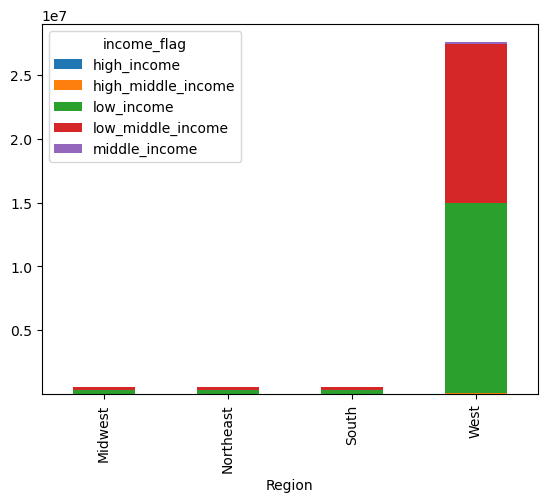

In [75]:
#Creating visualization based on results
regional_income_bar = regional_income.plot(kind= 'bar', stacked = True)

In [70]:
#Creating crosstab for income and department
department_income = pd.crosstab(instacart_regular_activity['department_id'], instacart_regular_activity['income_flag'])

In [71]:
department_income

income_flag,high_income,high_middle_income,low_income,low_middle_income,middle_income
department_id,,,,,
1,3172,4262,1073449,915834,11265
2,60,97,17503,14325,290
3,2011,2523,563040,488964,7279
4,9254,10158,4578769,3961071,27102
5,1307,1293,72140,60111,3135
6,422,400,128793,111435,1049
7,4324,4352,1366608,1040733,14673
8,416,314,45122,40979,1026
9,1328,1420,406363,364807,3886


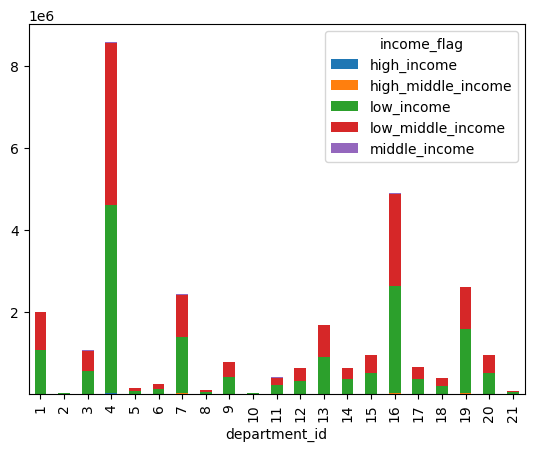

In [72]:
#Creating visualization based on results
department_income_bar = department_income.plot(kind= 'bar', stacked = True)

Dependent Profile

In [77]:
#Creating crosstab for dependents and region
regional_dependents = pd.crosstab(instacart_regular_activity['Region'], instacart_regular_activity['dependent_flag'])

In [78]:
regional_dependents

dependent_flag,large_family,middle_family,small_family
Region,,,
Midwest,151244,271775,136184
Northeast,139775,297799,144999
South,133036,284699,155169
West,6920567,13778989,6883130


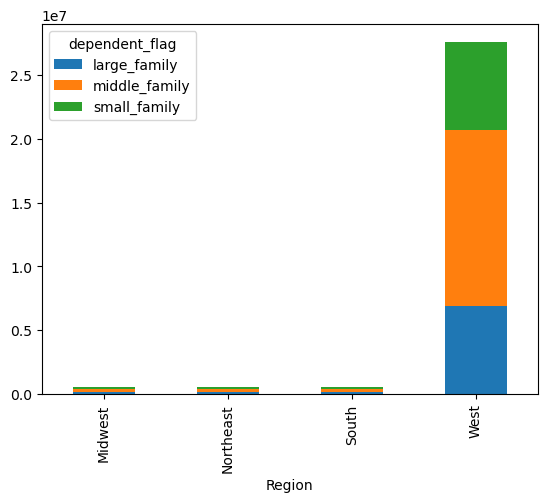

In [79]:
#Creating visualization based on results
regional_dependent_bar = regional_dependents.plot(kind= 'bar', stacked = True)

In [80]:
#Creating crosstab for dependents and department
department_dependents = pd.crosstab(instacart_regular_activity['department_id'], instacart_regular_activity['dependent_flag'])

In [81]:
department_dependents

dependent_flag,large_family,middle_family,small_family
department_id,,,
1,504031,1003038,500913
2,7842,16358,8075
3,265737,530645,267435
4,2160500,4277574,2148280
5,35341,67428,35217
6,60124,121032,60943
7,604683,1215655,610352
8,22049,43730,22078
9,196925,387742,193137


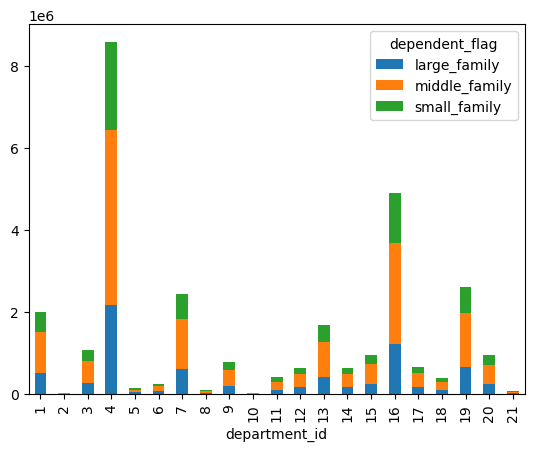

In [82]:
#Creating visualization based on results
department_dependent_bar = department_dependents.plot(kind= 'bar', stacked = True)

Department_id Profile

In [87]:
#Creating crosstab for pets and region
regional_pet_department = pd.crosstab(instacart_regular_activity['pet_flag'], instacart_regular_activity['Region'])

In [88]:
regional_pet_department

Region,Midwest,Northeast,South,West
pet_flag,,,,
anti_pet,557677,580861,571018,27499953
pet_friendly,1526,1712,1886,82733


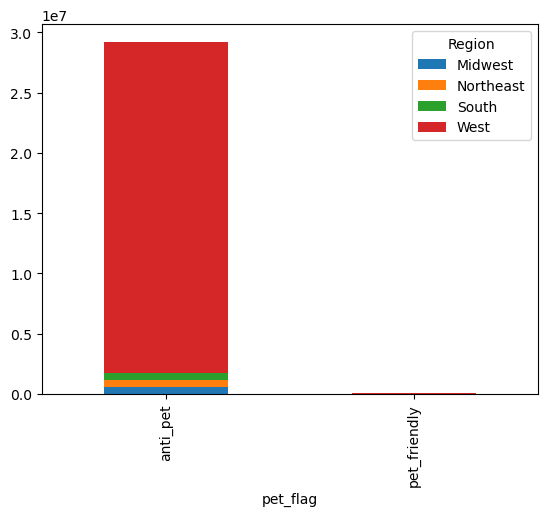

In [89]:
#Creating visualization based on results
regional_pet_department_bar = regional_pet_department.plot(kind= 'bar', stacked = True)

# Exporting visualizations

In [90]:
# Exporting regional_age_bar
regional_age_bar.figure.savefig(r'C:\Users\makay\Documents\Pythons files\Master folder\04 Analysis\visualizations\regional_age_bar.png')

In [91]:
# Exporting department_age_bar
department_age_bar.figure.savefig(r'C:\Users\makay\Documents\Pythons files\Master folder\04 Analysis\visualizations\department_age_bar.png')

In [92]:
# Exporting regional_income_bar
regional_income_bar.figure.savefig(r'C:\Users\makay\Documents\Pythons files\Master folder\04 Analysis\visualizations\regional_income_bar.png')

In [93]:
# Exporting department_income_bar
department_income_bar.figure.savefig(r'C:\Users\makay\Documents\Pythons files\Master folder\04 Analysis\visualizations\department_income_bar.png')

In [94]:
# Exporting regional_dependent_bar
regional_dependent_bar.figure.savefig(r'C:\Users\makay\Documents\Pythons files\Master folder\04 Analysis\visualizations\regional_dependent_bar.png')

In [95]:
# Exporting department_dependent_bar
department_dependent_bar.figure.savefig(r'C:\Users\makay\Documents\Pythons files\Master folder\04 Analysis\visualizations\department_dependent_bar.png')

In [96]:
# Exporting regional_pet_department_bar
regional_pet_department_bar.figure.savefig(r'C:\Users\makay\Documents\Pythons files\Master folder\04 Analysis\visualizations\regional_pet_department_bar.png')

# Exporting final data set

In [97]:
instacart_regular_activity.to_pickle(r'C:\Users\makay\Documents\Pythons files\Master folder\02 Data\Prepared Data\instacart_regular_activity')